# 0.0 IMPORTS

In [117]:
import pandas                                     as pd
import inflection
import math
import numpy                                      as np
import seaborn                                    as sns
import matplotlib.pyplot                          as plt
import matplotlib.gridspec                        as gridspec

import datetime
from IPython.display       import Image
from IPython.core.display  import HTML

from imblearn              import over_sampling   as os
from imblearn              import combine         as c

## 0.1 Helper Function

In [118]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [119]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [120]:
df_cols_name = pd.read_csv('data/features.txt', sep="          ", header=None)
cols_name = df_cols_name[0].tolist()

C:\Users\favh2\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [121]:
df_X_raw = pd.read_csv('data/train/X_train.txt', sep=" ", header=None)
df_y_raw = pd.read_csv('data/train/y_train.txt', sep=" ", header=None)
df_subject_raw = pd.read_csv('data/train/subject_id_train.txt', sep=" ", header=None)

df_X_raw.columns = cols_name

# join
df_raw = df_X_raw
df_raw['subject'] = df_subject_raw
df_raw['position'] = df_y_raw

In [122]:
df_raw.sample()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [123]:
# To make the exploration of the data that we are going to do later on, I will replace the numbers contained in the target column with their respective references.
# This relation is contained in the file "activity_labels"

df_raw['position'] = df_raw['position'].map( {  1 : 'WALKING',           
                                            2 : 'WALKING_UPSTAIRS',  
                                            3 : 'WALKING_DOWNSTAIRS',
                                            4 : 'SITTING',           
                                            5 : 'STANDING',          
                                            6 : 'LAYING',            
                                            7 : 'STAND_TO_SIT',      
                                            8 : 'SIT_TO_STAND',      
                                            9 : 'SIT_TO_LIE',        
                                            10 : 'LIE_TO_SIT',        
                                            11 : 'STAND_TO_LIE',      
                                            12 : 'LIE_TO_STAND' } )

In [124]:
df_raw.sample(5)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

# 1.0 STEP 01 - DESCRIPTION OF DATA

In [125]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [126]:
df1.columns

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1',
       'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1',
       ...
       'fBodyGyroJerkMag-Kurtosis-1', 'tBodyAcc-AngleWRTGravity-1',
       'tBodyAccJerk-AngleWRTGravity-1', 'tBodyGyro-AngleWRTGravity-1',
       'tBodyGyroJerk-AngleWRTGravity-1', 'tXAxisAcc-AngleWRTGravity-1',
       'tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1', 'subject',
       'position'],
      dtype='object', length=563)

In [127]:
# To better unsderstand the name of the columns:

# The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. 
# These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. 
# Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. 
# Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

# Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 
# Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

# Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

# These signals were used to estimate variables of the feature vector for each pattern: '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

# tBodyAcc-XYZ
# tGravityAcc-XYZ
# tBodyAccJerk-XYZ
# tBodyGyro-XYZ
# tBodyGyroJerk-XYZ
# tBodyAccMag
# tGravityAccMag
# tBodyAccJerkMag
# tBodyGyroMag
# tBodyGyroJerkMag
# fBodyAcc-XYZ
# fBodyAccJerk-XYZ
# fBodyGyro-XYZ
# fBodyAccMag
# fBodyAccJerkMag
# fBodyGyroMag
# fBodyGyroJerkMag

# The set of variables that were estimated from these signals are: 

# mean(): Mean value
# std(): Standard deviation
# mad(): Median absolute deviation 
# max(): Largest value in array
# min(): Smallest value in array
# sma(): Signal magnitude area
# energy(): Energy measure. Sum of the squares divided by the number of values. 
# iqr(): Interquartile range 
# entropy(): Signal entropy
# arCoeff(): Autorregresion coefficients with Burg order equal to 4
# correlation(): correlation coefficient between two signals
# maxInds(): index of the frequency component with largest magnitude
# meanFreq(): Weighted average of the frequency components to obtain a mean frequency
# skewness(): skewness of the frequency domain signal 
# kurtosis(): kurtosis of the frequency domain signal 
# bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
# angle(): Angle between to vectors.

## 1.2 Data Dimensions

In [128]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 7767
Number of Cols: 563


## 1.3. Data Types

In [129]:
df1.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
tBodyAcc-STD-3                     float64
tBodyAcc-Mad-1                     float64
tBodyAcc-Mad-2                     float64
tBodyAcc-Mad-3                     float64
tBodyAcc-Max-1                     float64
tBodyAcc-Max-2                     float64
tBodyAcc-Max-3                     float64
tBodyAcc-Min-1                     float64
tBodyAcc-Min-2                     float64
tBodyAcc-Min-3                     float64
tBodyAcc-SMA-1                     float64
tBodyAcc-Energy-1                  float64
tBodyAcc-Energy-2                  float64
tBodyAcc-Energy-3                  float64
tBodyAcc-IQR-1                     float64
tBodyAcc-IQR-2                     float64
tBodyAcc-IQR-3                     float64
tBodyAcc-ropy-1                    float64
tBodyAcc-ro

## 1.4 Check NA

In [130]:
df1.isna().sum()

tBodyAcc-Mean-1                    0
tBodyAcc-Mean-2                    0
tBodyAcc-Mean-3                    0
tBodyAcc-STD-1                     0
tBodyAcc-STD-2                     0
tBodyAcc-STD-3                     0
tBodyAcc-Mad-1                     0
tBodyAcc-Mad-2                     0
tBodyAcc-Mad-3                     0
tBodyAcc-Max-1                     0
tBodyAcc-Max-2                     0
tBodyAcc-Max-3                     0
tBodyAcc-Min-1                     0
tBodyAcc-Min-2                     0
tBodyAcc-Min-3                     0
tBodyAcc-SMA-1                     0
tBodyAcc-Energy-1                  0
tBodyAcc-Energy-2                  0
tBodyAcc-Energy-3                  0
tBodyAcc-IQR-1                     0
tBodyAcc-IQR-2                     0
tBodyAcc-IQR-3                     0
tBodyAcc-ropy-1                    0
tBodyAcc-ropy-1                    0
tBodyAcc-ropy-1                    0
tBodyAcc-ARCoeff-1                 0
tBodyAcc-ARCoeff-2                 0
t

## 1.5 Check Unbalanced Data

In [131]:
df_balance = df1[['subject', 'position']].groupby( 'position' ).count().sort_values( 'subject' ).reset_index()
df_balance['perc%'] = 100*np.round( ( df_balance['subject'] / np.sum( df_balance['subject'] ) ), 4 )

In [132]:
df_balance

,position,subject,perc%
0,SIT_TO_STAND,23,0.30
1,STAND_TO_SIT,47,0.61
2,LIE_TO_STAND,57,0.73
3,LIE_TO_SIT,60,0.77
4,SIT_TO_LIE,75,0.97
5,STAND_TO_LIE,90,1.16
6,WALKING_DOWNSTAIRS,987,12.71
7,WALKING_UPSTAIRS,1073,13.81
8,WALKING,1226,15.78
9,SITTING,1293,16.65


## 1.6 Descriptive Analysis

### 1.6.1 General

In [133]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [134]:
num_attributes.sample()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [135]:
cat_attributes.sample()

,position
7765,WALKING_UPSTAIRS


#### 1.6.1.1 Numerical Attributes

In [136]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [137]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,tBodyAcc-Mean-1,-1.000000,1.000000,2.000000,0.038759,0.038975,0.101989,1.115500,36.044984
1,tBodyAcc-Mean-2,-1.000000,1.000000,2.000000,-0.000647,-0.002921,0.099967,1.101263,31.128704
2,tBodyAcc-Mean-3,-1.000000,1.000000,2.000000,-0.018155,-0.019602,0.089921,1.274708,40.981939
3,tBodyAcc-STD-1,-1.000000,1.000000,2.000000,-0.599017,-0.914202,0.441452,0.649653,-0.851111
4,tBodyAcc-STD-2,-1.000000,0.945956,1.945956,-0.634424,-0.827970,0.367535,0.483485,-0.974243
5,tBodyAcc-STD-3,-1.000000,1.000000,2.000000,-0.691270,-0.827696,0.321621,0.819244,0.157536
6,tBodyAcc-Mad-1,-1.000000,1.000000,2.000000,-0.623886,-0.924421,0.418086,0.700535,-0.681034
7,tBodyAcc-Mad-2,-1.000000,0.960341,1.960341,-0.657884,-0.838559,0.347982,0.593601,-0.513794
8,tBodyAcc-Mad-3,-1.000000,1.000000,2.000000,-0.740154,-0.852735,0.272602,0.937946,0.908588
9,tBodyAcc-Max-1,-1.000000,1.000000,2.000000,-0.360200,-0.717007,0.499227,0.626604,-1.110822


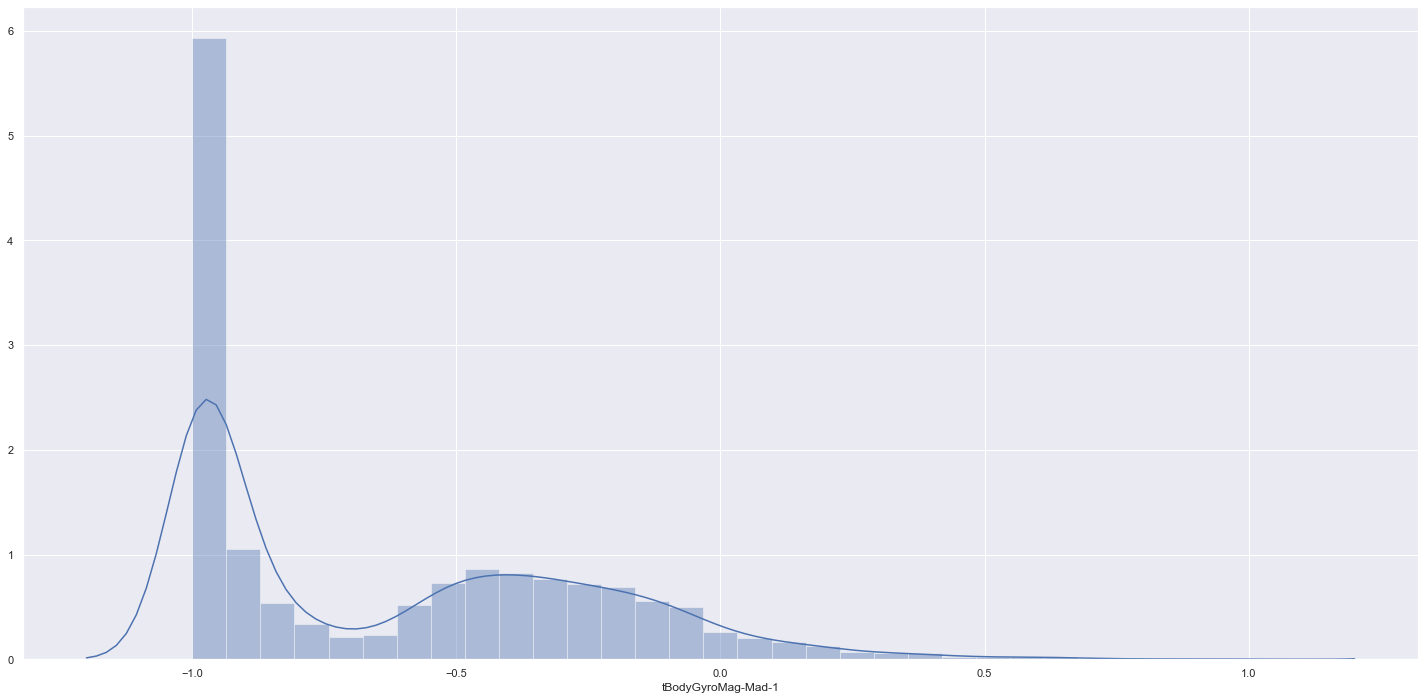

In [138]:
sns.distplot( df1['tBodyGyroMag-Mad-1'] )

#### 1.6.1.2 Categorical attributes

In [139]:
cat_attributes.describe()

,position
count,7767
unique,12
top,STANDING
freq,1423


# 2.0 STEP 02 - FEAUTURE ENGINEERING

In [140]:
df2 = df1.copy()

# There aren't any feature engineering to do.

# 3.0 STEP 03 - VARIABLE FILTERING

In [141]:
df3 = df2.copy()

# There aren't any filtering to do.

# 4.0 STEP 04 - UNBALANCED CLASSES

In [142]:
df4 = df3.copy()

## 4.1. Oversampling and Undersampling

In [161]:
df42 = df4.drop( ['subject', 'position'], axis=1 ).values

# Oversampling ( SMOTE ) + Undersampling ( Tomek Links )
smt = c.SMOTETomek( sampling_strategy='auto', random_state=32 )

# apply
X_smt, y_smt = smt.fit_sample( df42, df4['position'] )

In [176]:
cols_num = df4.select_dtypes( include=['float64'] ).columns.tolist()

df43 = pd.DataFrame( X_smt, columns=cols_num )
df43['position'] = y_smt

## 4.2. Check Balanced Dataset

In [177]:
100*df43['position'].value_counts( normalize=True )

LIE_TO_SIT            8.341149
STAND_TO_LIE          8.341149
LAYING                8.341149
STAND_TO_SIT          8.341149
SIT_TO_LIE            8.341149
WALKING_UPSTAIRS      8.341149
LIE_TO_STAND          8.341149
SIT_TO_STAND          8.341149
WALKING_DOWNSTAIRS    8.341149
WALKING               8.341149
SITTING               8.294256
STANDING              8.294256
Name: position, dtype: float64

# 5.0 STEP 05 - EXPLORATORY DATA ANALYSIS ( EDA )

## 5.1. Business Understanding - Validate Hypothesis

In [178]:
df51 = df4.copy()

### 5.1.1. Business Hypothesis

**1.** High accelerations happen when he is going down the stairs

**2.** High accelerations happen when he is lifting

**3.** Low speed happens when he is sitting

**4.** Zero speed when it is in the flashing positions

**5.** Gravity acceleration decreases when he is climbing the ladder

**6.** Gravity acceleration increases when he is sitting

**7.** Speed is constant when he is walking

### 5.1.2. Validation Hypothesis

#### H1. High accelerations happen when he is going down the stairs.

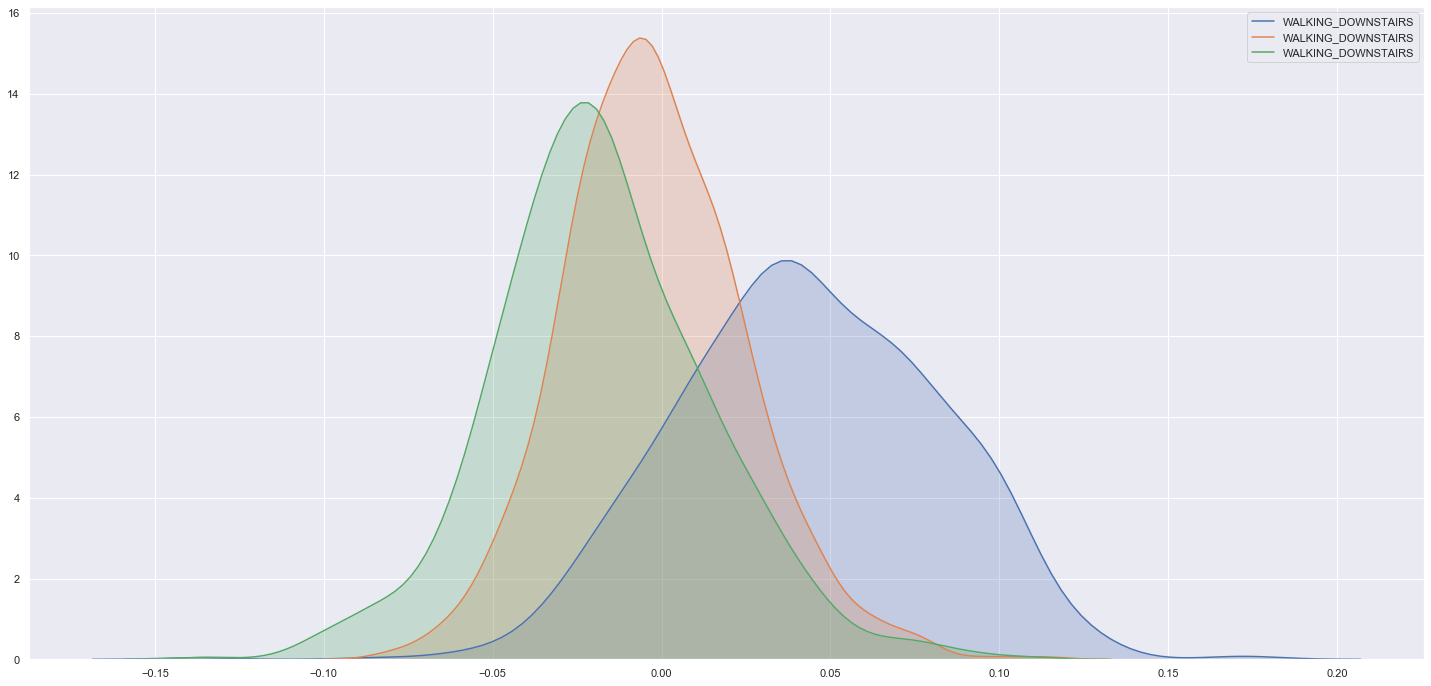

In [194]:
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-2'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-3'], label='WALKING_DOWNSTAIRS', shade=True )

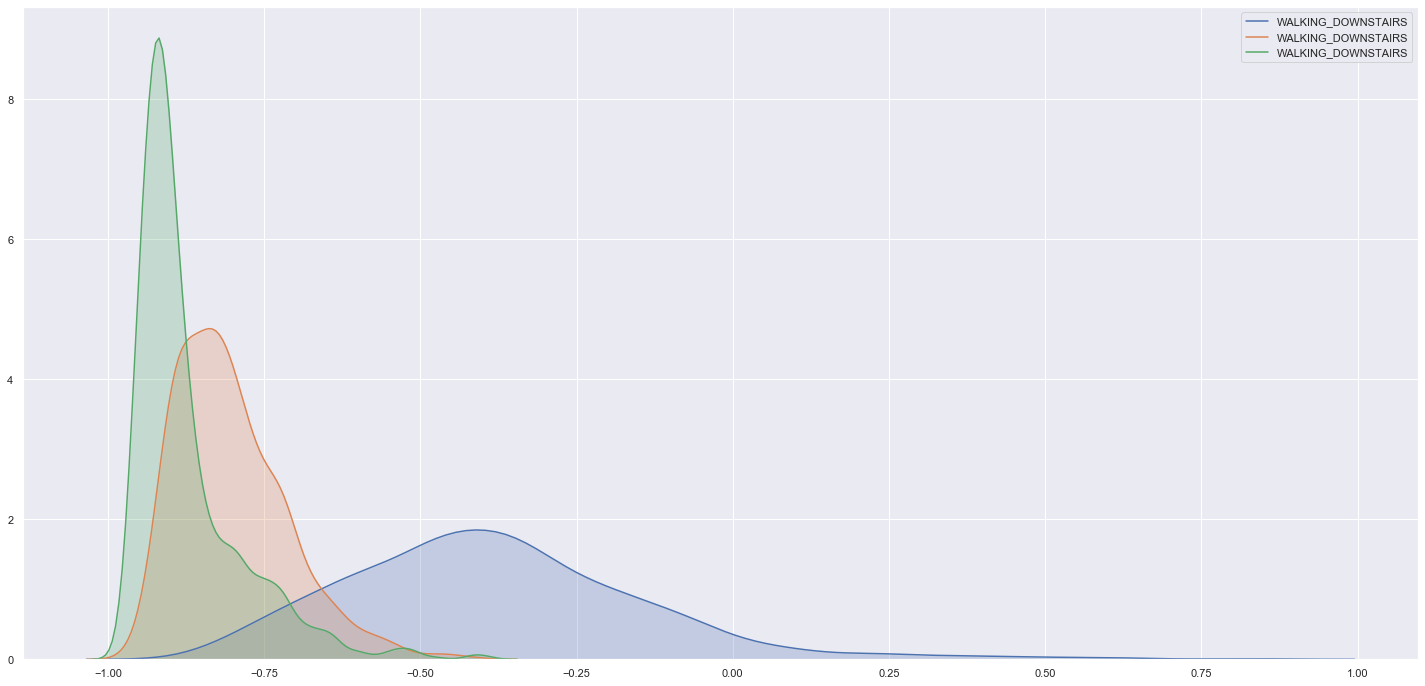

In [196]:
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Energy-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Energy-2'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Energy-3'], label='WALKING_DOWNSTAIRS', shade=True )

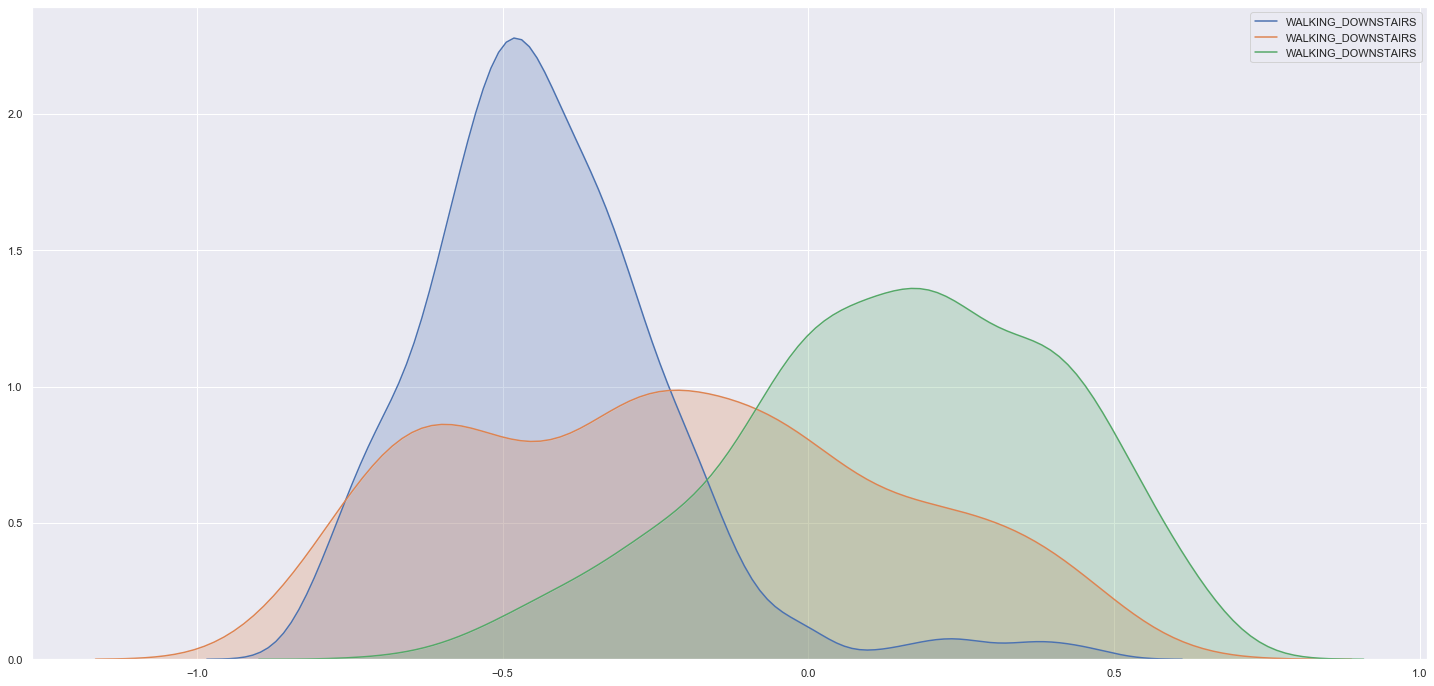

In [198]:
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Correlation-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Correlation-2'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKINaG_DOWNSTAIRS']['tBodyAcc-Correlation-3'], label='WALKING_DOWNSTAIRS', shade=True )

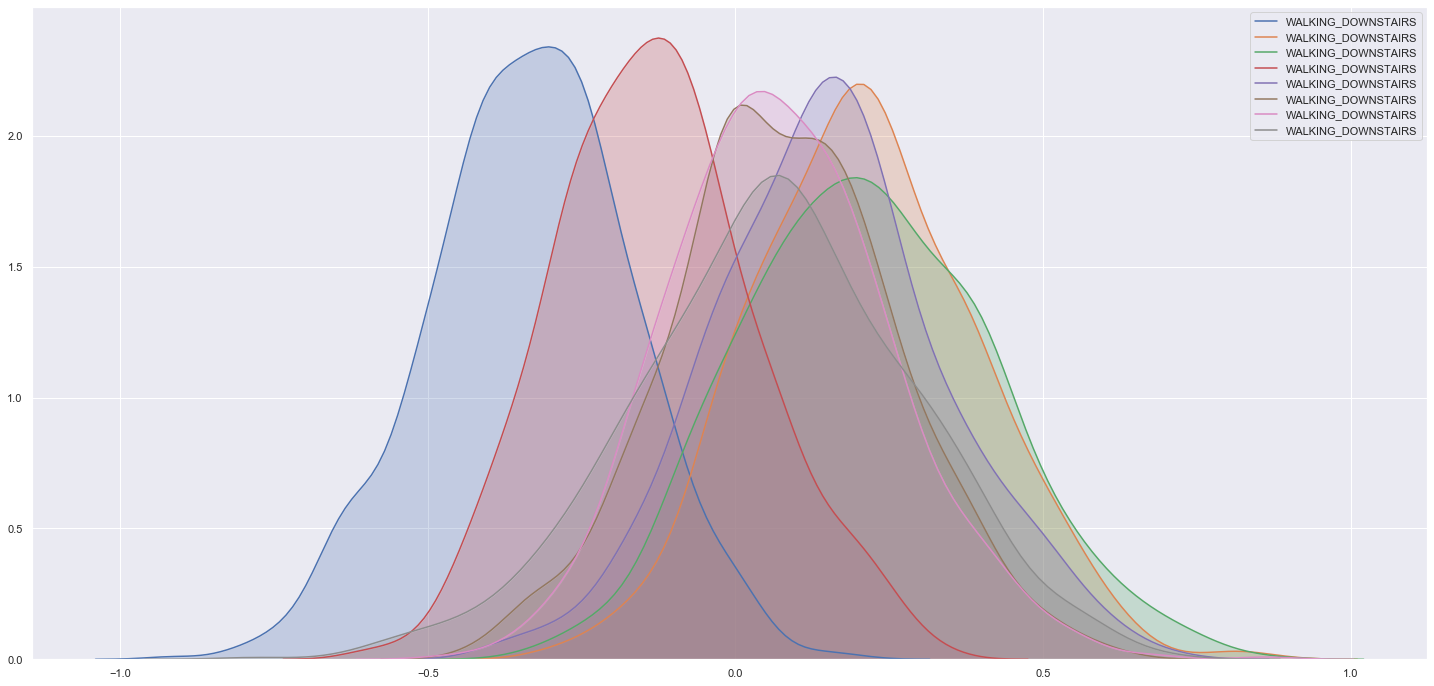

In [200]:
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-2'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKINaG_DOWNSTAIRS']['tBodyAcc-ARCoeff-3'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-4'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-5'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKINaG_DOWNSTAIRS']['tBodyAcc-ARCoeff-6'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-7'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-8'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKINaG_DOWNSTAIRS']['tBodyAcc-ARCoeff-9'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-10'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-ARCoeff-11'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKINaG_DOWNSTAIRS']['tBodyAcc-ARCoeff-12'], label='WALKING_DOWNSTAIRS', shade=True )

#### H2. High accelerations happen when he is lifting.

In [ ]:
#sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAcc-Mean-1'], label='WALKING', shade=True )
#sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
#sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
#sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAcc-Mean-1'], label='SITTING', shade=True )
#sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAcc-Mean-1'], label='STANDING', shade=True )
#sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAcc-Mean-1'], label='LAYING', shade=True )
sns.distplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyAcc-Energy-1'], label='STAND_TO_SIT' )
sns.distplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyAcc-Energy-1'], label='SIT_TO_STAND' )
sns.distplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyAcc-Energy-1'], label='SIT_TO_LIE' )
sns.distplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyAcc-Energy-1'], label='LIE_TO_SIT' )
sns.distplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyAcc-Energy-1'], label='STAND_TO_LIE' )
sns.distplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyAcc-Energy-1'], label='LIE_TO_STAND' )

#### H3. Low speed happens when he is sitting.

#### H4. Zero speed when it is in the flashing positions.

#### H5. Gravity acceleration decreases when he is climbing the ladder.

#### H6. Gravity acceleration increases when he is sitting.

#### H7. Speed is constant when he is walking.